# Introduction to statistical learning

In [2]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

**1. The Auto Dataset**

In [22]:
auto_df = pd.read_csv(r'C:\Users\caine\OneDrive\Documents\statistical_learning_problems\0 datasets\Auto.csv',
                      na_values=['?'])
auto_df = auto_df.dropna()

In [23]:
auto_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [24]:
auto_df.shape

(392, 9)

In [25]:
auto_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


*(a) Which of the predictors are quantitative, and which are qualitative?*

We can see from the column dtypes that all of the predictors are quantitative except for the name of the car which is qualitative. However, if we check the value counts for cylinders and origin we find there are only a small number of possible values. Hence these two columns are more like categorical variables than quantitative.

In [26]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [27]:
auto_df['cylinders'].value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

In [28]:
auto_df['origin'].value_counts()

origin
1    245
3     79
2     68
Name: count, dtype: int64

In [29]:
auto_df_quantitative = auto_df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']]

*(b) What is the range of each quantitative predictor?*

We can write a find range that can be passed as a callback function to the apply method of pandas dataframe. If we set the axis parameter to zero then the function will be applied across the index (i.e. down the dataframe).

In [32]:
def find_range(data:pd.Series) -> float:
    """
    A function that can be applied to a numerical column of a dataframe
    or a numerical Series and will return the range (max - min)
    """
    return np.max(data) - np.min(data)

auto_df_quantitative.apply(find_range, axis=0)

mpg               37.6
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
year              12.0
dtype: float64

*(c) What is the mean and standard deviation of each quantitative predictor?*

To find the mean and standard deviation of each quantitative predictor we can use the builtin mean and std methods of a pandas dataframe

In [34]:
auto_df_quantitative.mean()

mpg               23.445918
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
year              75.979592
dtype: float64

In [35]:
auto_df_quantitative.std()

mpg               7.805007
displacement    104.644004
horsepower       38.491160
weight          849.402560
acceleration      2.758864
year              3.683737
dtype: float64

*(d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?*

To remove the 10th through to the 85th observation we can use the syntax to filter a dataframe. To filter a dataframe we create a boolean array that is true for values of the index less than 10 or greater than 85 and filter the dataframe based on this array. We can see all the rows 10 through to 85 have no been removed in the dataframe *auto_df_filtered*. We then calculate the mean and std as above

In [37]:
auto_df_filtered = auto_df[(auto_df.index < 10) | (auto_df.index > 85)]
auto_df_filtered.head(15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [38]:
auto_df_filtered_quantitative = auto_df_filtered[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']]

In [39]:
auto_df_filtered_quantitative.apply(find_range)

mpg               35.6
displacement     387.0
horsepower       184.0
weight          3348.0
acceleration      16.3
year              12.0
dtype: float64

In [40]:
auto_df_filtered_quantitative.mean()

mpg               24.374763
displacement     187.880126
horsepower       101.003155
weight          2938.854890
acceleration      15.704101
year              77.123028
dtype: float64

In [41]:
auto_df_filtered_quantitative.std()

mpg               7.872565
displacement    100.169973
horsepower       36.003208
weight          811.640668
acceleration      2.719913
year              3.127158
dtype: float64

*(e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.*

First turn your focus to that scatter matrix. This shows the distribution of the quantitative variables and the relationships between pairs of quantitative variables. Firstly we see that mpg is negatively correlated with displacement, horsepower and weight. The relationship with all three is not linear, they exhibit an inverse relationship. This means that as weight, for example, increases mpg decreases but at a slower rate. 

Importantly, weight, displacement and horsepower are all positively correlated and the relationship appears to be relatively linear. Heavier cars having more displacement is obvious, but there is no necessary connection between weight or displacement and horsepower. This is until we examine the boxplot that captures how the distribution of horsepower for each number of cylinders. There is a clear positive relationship here. This accounts for the relationship between horsepower, weight and displacement. As we increase the number of cylinders both the horsepower and the weight of the car increase aswell. 

Cylinders could be called a confounding variable, weight doesn't cause more horsepower or vice versa, both are determined, to some extend, by the number of cylinders on the cars engine. The classical example of this is ice cream and swimming trunk sales - buying one does not cause you to buy the other both are driven by the weather.

If we move on to look at the year variable we see some interesting trends. Newer cars tend to have a higher mpg and a lower displacement, weight and horsepower. We could infer from this that the cars also have fewer cylinders. 

The acceleration of a car is negatively associated with weight, displacement and horsepower. Heavier cars accelerate more slowly as they require a greater force to change the speed of their mass. 

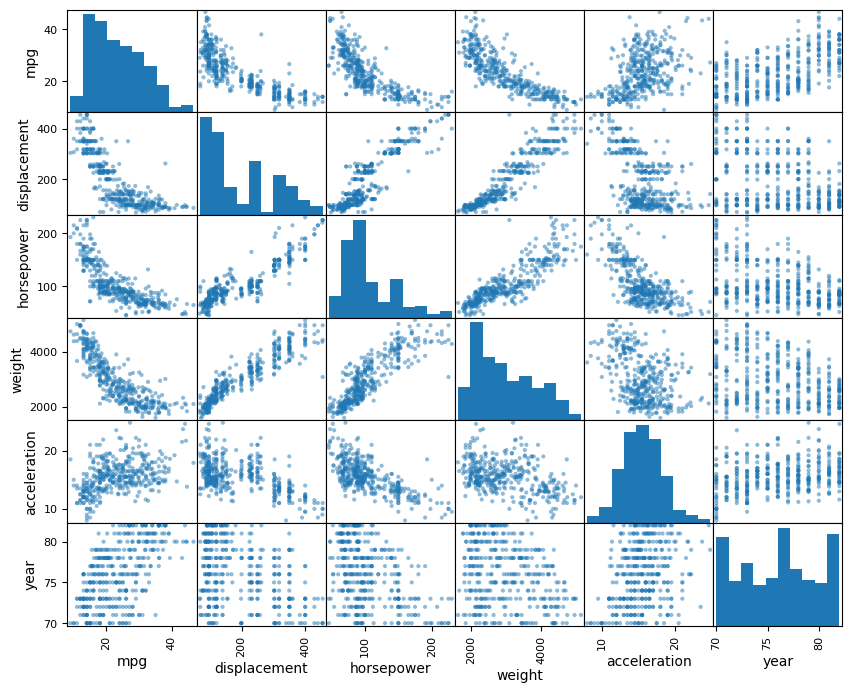

In [47]:
pd.plotting.scatter_matrix(auto_df_quantitative, figsize=(10,8));

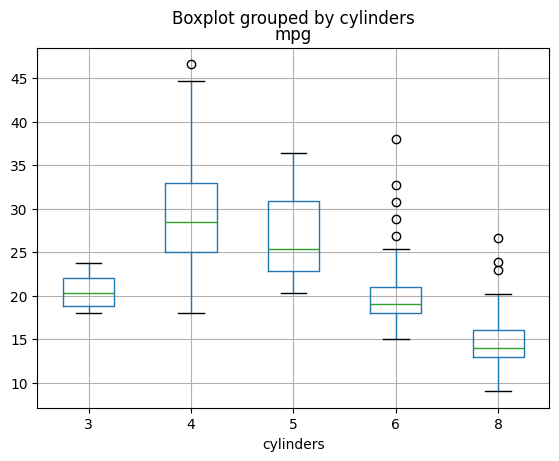

In [54]:
auto_df.boxplot('mpg', 'cylinders');

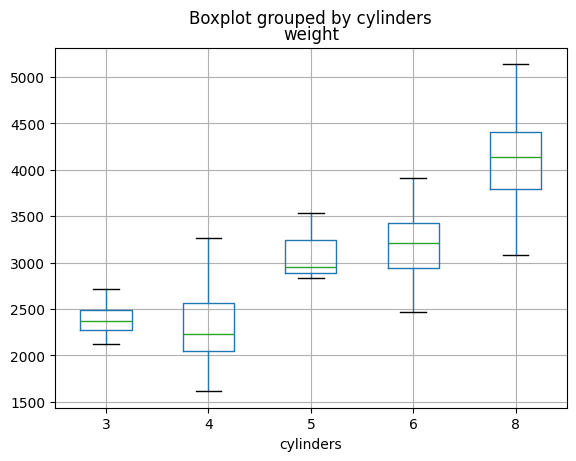

In [55]:
auto_df.boxplot('weight', 'cylinders');

<Axes: title={'center': 'horsepower'}, xlabel='cylinders'>

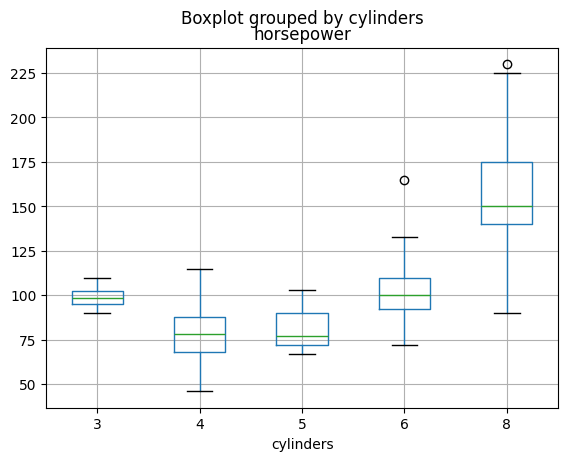

In [53]:
auto_df.boxplot('horsepower', 'cylinders')

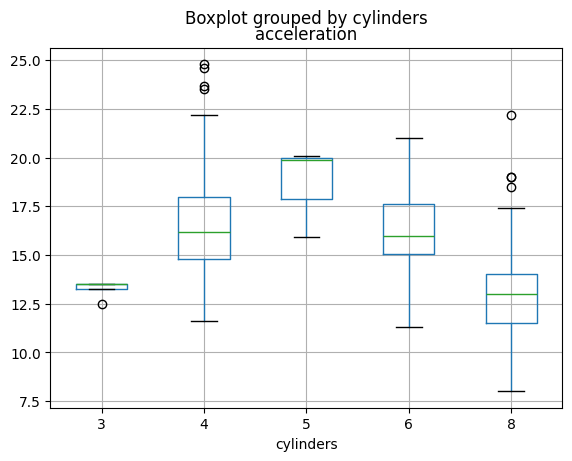

In [57]:
auto_df.boxplot('acceleration', 'cylinders');

*(f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.*

Yes as the discussion above suggests, the year, the weight, the displacenment, the number of cylinders and the horsepower would all be useful in predicting the mpg. However, we would have to careful about which predictors we use, Weight, displacement and horsepower are all highly correlated and if we used them all in the same model then we would run into issues of multicolinnearity.

**2. Boston Housing**

In [100]:
boston = pd.read_csv(r'C:\Users\caine\OneDrive\Documents\statistical_learning_problems\0 datasets\Boston.csv')

In [101]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [102]:
boston.shape

(506, 14)

In [103]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [104]:
boston.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

*(a) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.*

Firstly note the 'CHAS' column is a dummy variable that captures whether a house bounds the Charles River. Lets create a scatter matrix for all of other columns.

The first thing to notice in the scatter plots is that in several visuals all of the data points are squeezed into a small space, with very small proportion of the data occupying the rest of the space. This is due to outliers in the dataset. For example, all of the scatter plots with per capital crime rate (CRIM) on the x-axis have their data points condensed in the left hand side of the axis. We find out why this happening when we look at the histogram for CRIM. Almost all of the suburbs (each row) have a crime rate lower than say 10 crimes per person. Howeverm, there are four boroughs with a crime rate close to 50 and three more with a crime rate greater than 50. This effect makes it very difficult to interpret the scatter plots. 

One way to address this is to remove these outliers and replot. If we were buliding a predictive model we probably wouldn't remove the outliers from the model, but it might be helpful for the EDA phase. The first step in removing outliers is identifying them. There are several methods we can use to identify outliers. For example we could use the IQR (interquartile range) method; any value less than Q1 - IQR or greater than Q3 + IQR is removed.

We also see some very clear linear relationships. For example there is a positive linear relationship between median house price and the average number of rooms per dwelling. This is an obvious and expected relationship - houses with more rooms are worth more. There is also a clear negative relationship between the weighted distance to five Boston employment centres (DIS) and the proportion of occupied units built prior to 1940 (AGE). This suggests that the employment centres were built in the newer suburbs of Boston.

On the other hand, a lot of the relationships are non linear. For example, the relationship between DIS and the median value of a house appear to be almost logarithmic. Initially, as DIS increases (houses get further away from employment centres), the value of a house starts to increase, after the value of DIS is about 5 this relationships stops and further distance from the employment centres does not have an effect on the house prices.

There are many other notable points, one final one is that the median value of houses appears to a normally distributed random variable that is skewed to the right. This means there is a long tail of suburbs with very high median values but most suburbs tend to cluster around the mean.

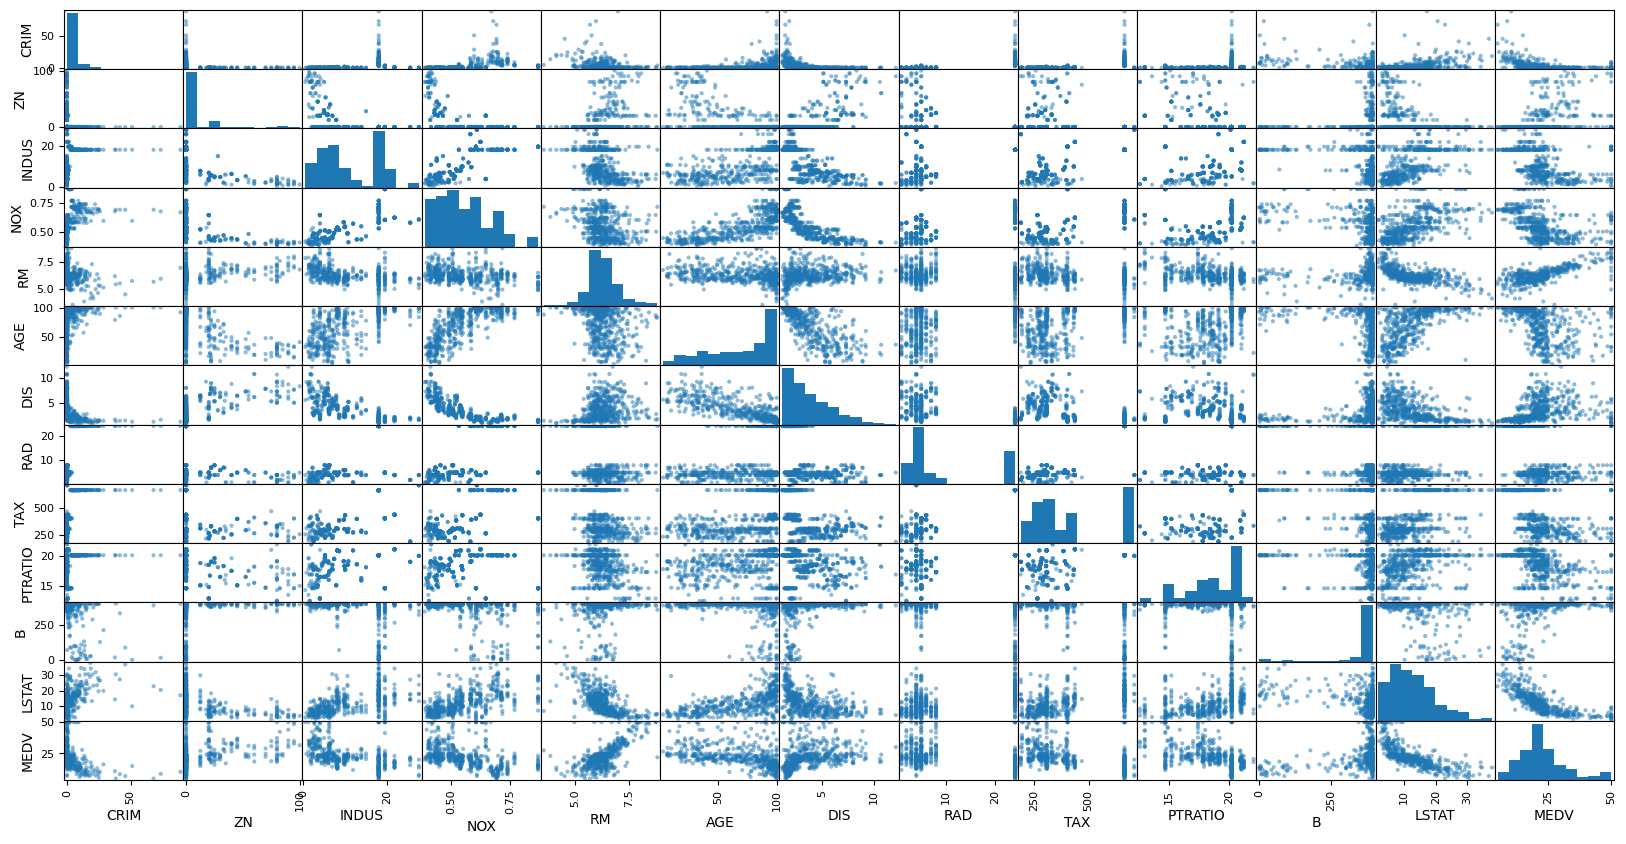

In [105]:
quant_columns = boston.columns.drop('CHAS')
pd.plotting.scatter_matrix(boston[quant_columns], figsize=(20, 10));

*(b) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.*

Yes several of the predictors appear to be associated with the per capita crime rate. As mentioned above their is a clear positive linear relationship between the number of rooms and the house prices. There also appears be a negative linear relationship with the proportion of the suburban population who are of lower socioeconomic status (LSTAT).

There is certainly a relationship between the age predictor (defined above) and the median value. However, this appears to be a nonlinear relationship. Age doesn't seem to have any effect until the houses the proportion of houses built prior to 1940 approached 100% at this point the median value declines sharply. To model this interaction we could create a dummy variable called 'very old' and assign it a value of one if the age variable is greater than 90 and 0 otherwise.


*(c) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.*

To examine if any of the suburbs have particularly high crime rates, tax rates or pupil teacher ratios we can create a boxplot for each variable and check if the plot contains any outliers.

We can see the crime rate boxplot has many outliers all in the right hand side of the distribution indicating these are very large values. We can say with high confidence that some of the suburbs do have very high crime rates. 

Looking at the tax rate boxplot no outliers have been plotted. However, if we examine the histogram above we notice most values between 0-500 and then there is one bar at the far right of the distribution. We might say that this histogram indicates that the tex prediction does have very high values.

The pupil teacher ratio on the other hand does not have any very high values, it does however have two very low values. There are two suburbs where there are not very many pupils to teachers.

<Axes: >

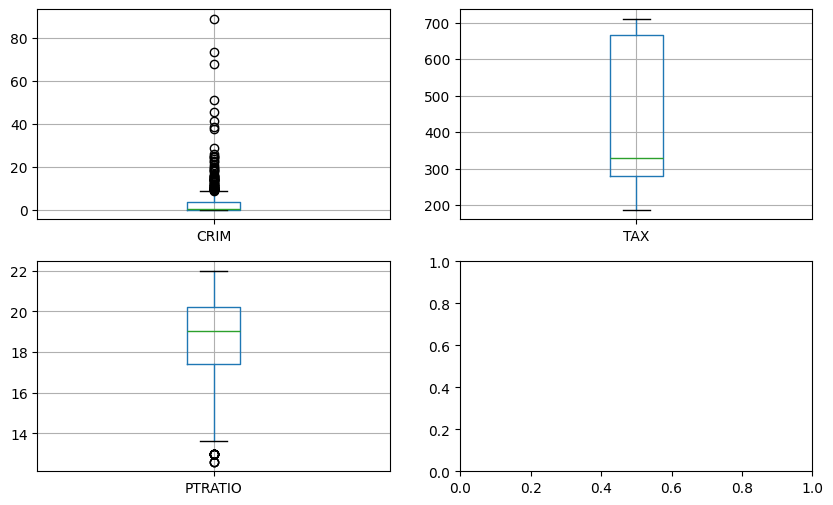

In [106]:
fig, ax = plt.subplots(2,2, figsize=(10,6))
boston[quant_columns].boxplot('CRIM', ax=ax[0][0])
boston[quant_columns].boxplot('TAX', ax=ax[0][1])
boston[quant_columns].boxplot('PTRATIO', ax=ax[1][0])

*(d)  How many of the suburbs in this data set bound the Charles river?*

This is simple to find. As mentioned above the column CHAS is an indicator variable for whether the suburb has a tract that bounds the rive. Therefore, we simply need to filter the dataframe for rows where CHAS is one and print the length - we could also use value counts to get the number of suburbs bordering the CHAS.

There are 506 suburbs with a tract bordering the CHAS river.

In [112]:
len(boston['CHAS'] == 1)

506

*(e) What is the median pupil-teacher ratio among the towns in this data set?*

We can use pandas built in median method to find the median value of any quantitative variable in the dataframe. For the pupil-teacher ratio we find the median value is 19.01. That is, 50% of suburbs have a pupil-teacher ratio higher than 19.1 and 50% have ratio lower

In [113]:
boston['PTRATIO'].median()

19.05

*(f)  Which suburb of Boston has lowest median value of owner occupied homes? What are the values of the other predictors for that suburb,and how do those values compare to the overall ranges for those predictors? Comment on your findings.*

We find that two suburbs have the joint lowest median value of owner occupied homes. These suburbs are at positions 398 and 405 in the dataframe. 

To compare the values of the predictors with the overall range we can plot a boxplot for each predictor and then mark the values for the lowest valued suburbs on each plot.

We can use this plot to see how these values compare with the overall ranges for the predictors. For example, the two lowest valued suburbs are:
* way above average for crime rate
* at the bottom of the distribution for the proportion residential land zoned for plots over 25,000ft (ZN)
* are in the top of distribution for the proportion of non-retail business acres across town (INDUS)
* are in the top distribution for nitrus oxides concentration (NOX)
* are in the lower end of distribution for avg number of rooms per dewlling

In [114]:
boston[boston['MEDV'] == boston['MEDV'].min()].index

Index([398, 405], dtype='int64')

In [116]:
boston.iloc[[398, 405]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


13


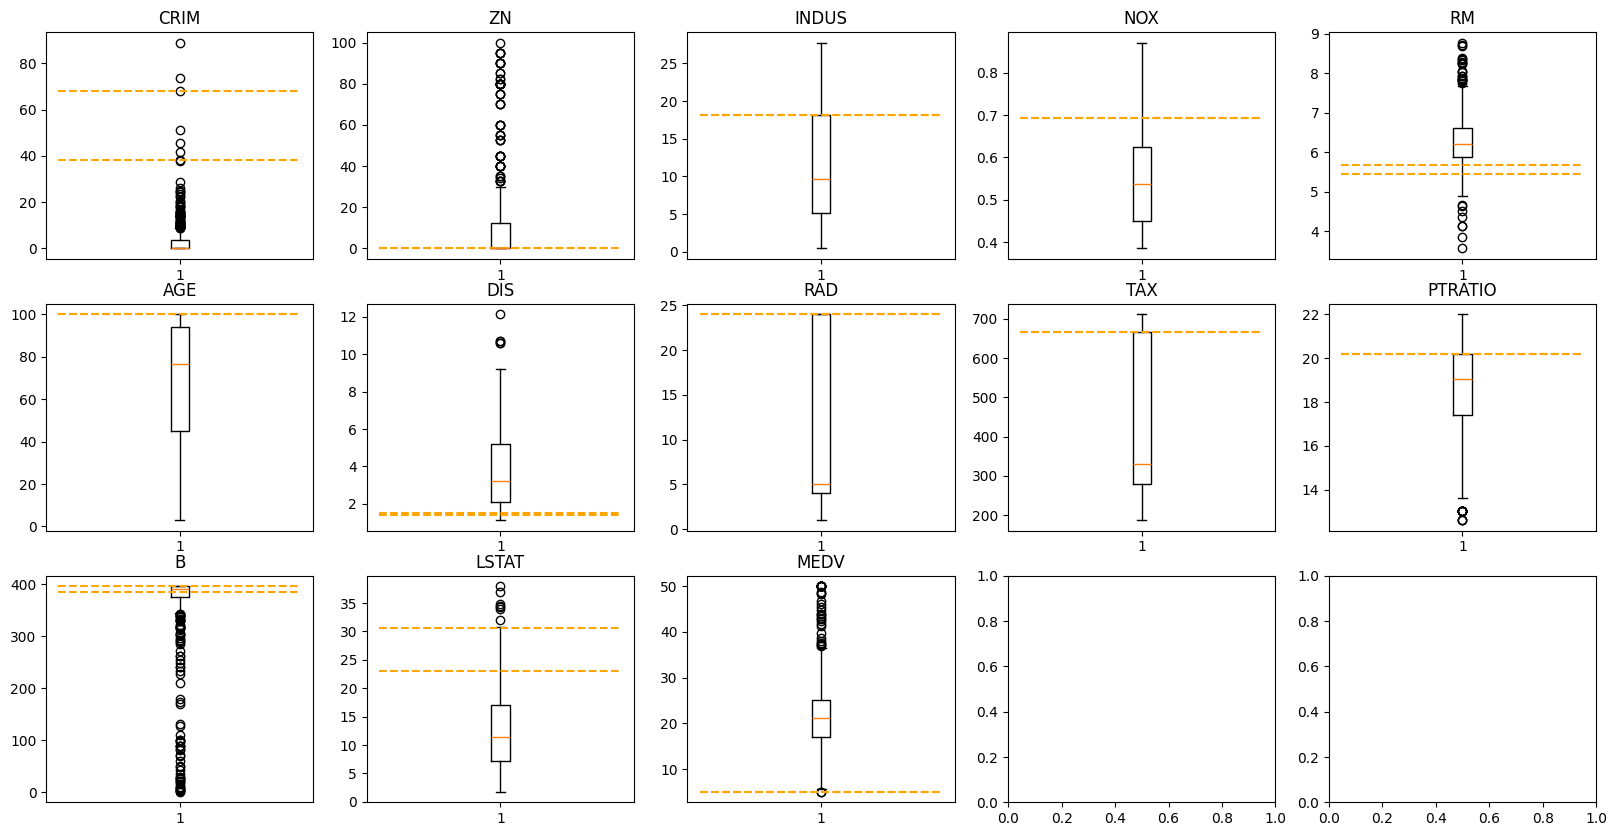

In [150]:
from math import floor
fig, ax = plt.subplots(3,5, figsize=(20,10))
boston_quantitative = boston[quant_columns]
print(len(boston_quantitative.columns))
for i, column in enumerate(boston_quantitative.columns):
    ax[floor(i/5)][i % 5].boxplot(x=boston_quantitative[column].dropna())
    ax[floor(i/5)][i % 5].plot([0, 2], [boston.iloc[398][column], boston.iloc[398][column]], ls='--', c='orange')
    ax[floor(i/5)][i % 5].plot([0, 2], [boston.iloc[405][column], boston.iloc[405][column]], ls='--', c='orange')
    ax[floor(i/5)][i % 5].set_title(column)

*(g) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.*

We can examine how many suburbs have an average of seven or an average of more than eight rooms by using the pandas cut method. This method can bin an input into userdefined bins. We can then use value counts to count the number of occurences for each bin. We can see from the output that 64 suburbs had seven or more rooms per dwelling on average and only 13 had eight or more.

We can analyse the suburbs with eight or more by subtracting the median value of each feature and plotting the bar chart of the average value per column. The bar chart shows us that these suburbs tend to contain newer builds, have fewer people from a disadvantaged socioeconomic background and tend to have far greater median house price values

In [178]:
pd.cut(boston['RM'], bins=[i for i in range(2, 11)]).value_counts().sort_index()



RM
(2, 3]       0
(3, 4]       2
(4, 5]      14
(5, 6]     157
(6, 7]     269
(7, 8]      51
(8, 9]      13
(9, 10]      0
Name: count, dtype: int64

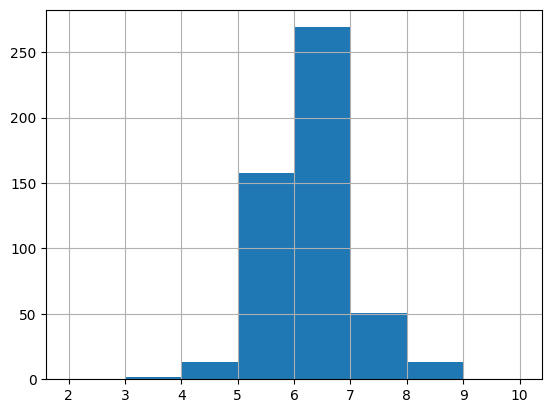

In [179]:
boston['RM'].hist(bins=[i for i in range(2, 11)]);

<Axes: >

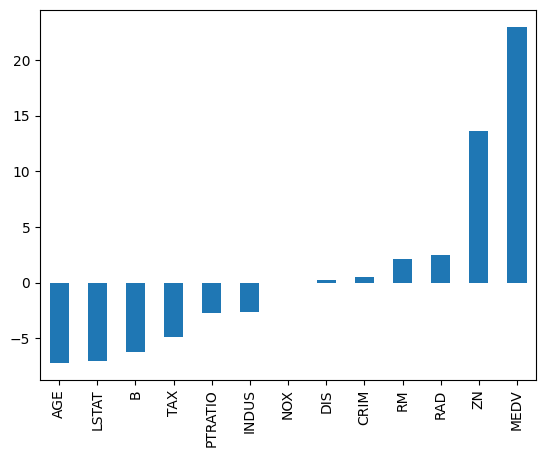

In [180]:
suburbs_rm_ge_8 = boston_quantitative[boston_quantitative['RM'] >= 8]
suburbs_rm_ge_8 = suburbs_rm_ge_8  - boston_quantitative.median()
suburbs_rm_ge_8.mean().sort_values().plot(kind='bar')